# A look on the 2019 summer market of football tranfers 

 Complex Network course, due on the 19th December of 2019.

Football is a sport where eleven players compete eleven other in order to score goals and win a match. This sport has grown and an whole economy has grown around it. There exists what is called the Big 5 Leagues (even if it is debated) composed of England, Spain, Germany, Italy and France first leagues. Those are the one where most of money is. The main place where this money is shown to the spectator is the transfer market, especially the summer transfer market where clubs spend money to buy players. This occurs mainly in July and August, and it is well commented as it is the only source of discussion for football fans at this period. However, the comments are focused on the biggest tranfers, the more expansive ones and the majority is forgotten. The main goal of this analysis will be to investigate the existence or not of some patters, some preferential schemes in the football summer transfer market.

## 1.Data Collection

The first thing to do was to find the data. Football is a professionnal, structured field, where a lot of data is used and especially statistics. However, making those statistics costs money so most of it is selled to clubs or media, and therefore not accessible. Still, it is possible to recover some from football news websites, a jupyter notebook (Football_transfer_data.ipynb) is dedicated to it. 

The choice has been made to start with an undirected, unweighted graph which is the simplest type of graph possible. If enough time is available, one could explore the case of a directed or/and a weighted graph.

At the end of the process, we have a .gexf file which describes the graph G. The nodes are the clubs that have taken part into at least one transfer during the 2019 summer, and there is an edge if there has been at least one tranfer between two clubs. On some nodes, there are labels that identify their country and/or the league in which they play.

In [1]:
import networkx as nx
path = 'data/edges_att.gexf'

G = nx.read_gexf(path)

## 2.Graph Overview

### 2.1. General Statistics

The first statistics we have is the number of nodes/vertices V = 4224 and the number of edges E = 4135. This graph is quite small in terms of complex network analysis (compared to the million of users on social media for example), but is still too large to be analysed by hand. A first characterisation is the density of the graph. For an undirected graph, it is defined as $d = \frac{2E}{V(V-1)}$ and we have $d=4.6\times 10^{-4}$. Which is quite small compared to graphs of similar size. Another quantity that confirm this trend is the average degree, which is $<k>=1.96$.

The information here is that the graph is less connected compared to networks of similar size in real life. This could be due to the fact that creating an edge literally cost money, and clubs do not have the possibility to make as many transfers as they want in one summer. As the number of clubs is more or less constant, taking into account more transfer windows would probably increase those numbers.

In [17]:
V = nx.number_of_nodes(G)
E = nx.number_of_edges(G)
d = nx.density(G)
inf = nx.info(G)
clustering = nx.algorithms.cluster.average_clustering(G)
path_length = nx.algorithms.shortest_paths.generic.shortest_path_length(G)
print('V = {}, E = {}, d = {:.2e}'.format(V,E,d))
print(inf.strip('Name:'))
#print('Average clustering coefficient = {}'.format(clustering)) #doesn't work

V = 4224, E = 4135, d = 4.64e-04
 
Type: Graph
Number of nodes: 4224
Number of edges: 4135
Average degree:   1.9579
Average clustering coefficient = 0.0


The next step is to visualize the graph and try to infer some informations. This is made using the Gephi software :

<img src="visualisation.png" />




The graph has been spacialized using the Force Atlas 2 algorithm on the Gephi software. The priciple is that nodes repell each other and edges act as springs between the nodes. The result is a clear separation between the connected components and eventually a segregation between different dense subgraphs (or communities).

The result here is that we can see a lot of nodes only connected by pairs that corresponds mostly to small clubs that have only made one transfer (in or out) in the whole summer.This confirms the assumption made earlier. Also, there is one giant connected componnents that includes a lot of interconnected clubs.

In order to characterize it more accurately, it is useful to search the connected components in the graph.

### 2.2. Components

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Comp = nx.connected_components(G)
S = [G.subgraph(c).copy() for c in Comp]
S.sort(key=len)
print('Number of connected components = {}'.format(len(S)))
Comp_size = [len(sub_comp) for sub_comp in S]
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(Comp_size,'k+')
plt.title('Number of nodes by component')
plt.xlabel('Component')
plt.yscale('log')
plt.subplot(122)
n = 5
plt.plot(np.arange(len(S)-n+1,len(S)+1),np.array(Comp_size[-n:])/V*100,'k+')
plt.title('Percentage of nodes in component (Top {})'.format(n))
plt.show()
print('Percentage of nodes in component (Top {}) : '.format(n), np.array(Comp_size[-n:])/V*100,'(%)')

Number of connected components = 679


Percentage of nodes in component (Top 5) :  [ 0.26041667  0.28409091  0.42613636  0.82859848 58.00189394] (%)


Now we can characterize fully the different compnenents of the graph. The giant connected component make for 58% of the total number of nodes, linking more than 2000 clubs around the world together. It confirms that football is no longer local and restricted to a country, which would produce smaller components, that there is at least some links between the countries.

Also, most of the components contain 2 nodes and correspond to a single transfer between two clubs as stated when looking at the graph. 

A picture is provided below where the bigest components have been colored, the same spatialization as previously has been used :

<img src="Connected_comp.png" />

An idea could then be to study only the biggest connected component (in purple) as it contains the structure of the market. Yet, there is still to investigate the medium size components before going all the way to this. To do so, one can play with the component number (n_comp) below to visualize those component. n_comp = 1 correspond to the violet one, then as n increases, the size of the component decrease. The label displayed is the country in which a club plays, if specified on the left, and the league on the right.

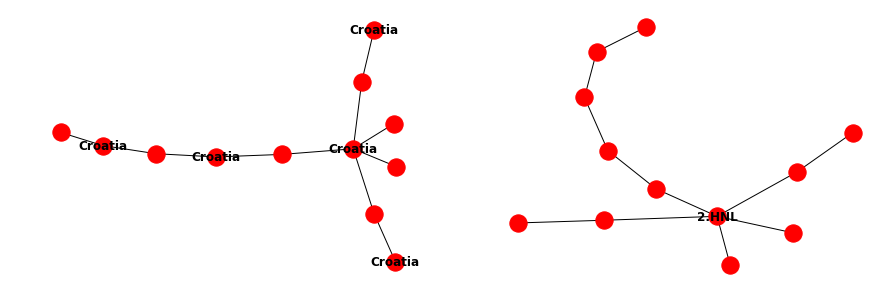

In [4]:
n_comp = 4
C = nx.get_node_attributes(S[-n_comp],'Country')
D = nx.get_node_attributes(S[-n_comp],'League')
plt.figure(figsize=(15,5))
plt.subplot(121)
nx.draw(S[-n_comp],labels=C, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw(S[-n_comp],labels=D, with_labels=True, font_weight='bold')

Exploring through the medium component shows behaviours closer to local ones. For example, n=2 is an eastern Europe cluster, somehow linked to a japanese club by one transfer, n=3 holds the same type of relationship, n=4 seems to be only croatian clubs, n=5 and 7 is central american clubs, n=6 is the iranese championship, etc. 

Most of these medium components correspond to transfer between lower divisions and in local environnement. An hypothesis can be made that with more data from previous years transfers, it is possible that these components would be connected to the big one as the probability to make a transfer to another club would increase. This could be also tested with a weighted version or multi-edge version of the graph because we could check if the ties between clubs correspond to multiple transfer or just one.

There can be two answers to this hypothesis, cases like n=4 or n=6 would likely correspond to local, strongly linked clusters, and cases like n=9, 10 would be weakly connected componenents, results of the 2019 snapshot, that could tend to connect to the big component. This remark would also imply that dealing with football club and transfer as a dynamical graph could highlight some properties of the market, and be another proof of the already well known evolution and history of football.

To go further into the analysis of the graph we will then use the giant connected component as the object of study.

In [21]:
Market = S[-1]

clustering = nx.algorithms.cluster.average_clustering(Market)
path_length = nx.algorithms.shortest_paths.generic.shortest_path_length(Market)

path = 'data/big_connected.gexf'
nx.write_gexf(Market, path, encoding='utf-8', prettyprint=True, version='1.1draft')

0.0


## 3.Communities

One baseline of this study was to characterize the topology of the market network. To do so, a classical tool of network analysis can be use : the detection of communities. There is several algorithm to search for communities in a graph and we will use the Louvain modularity based algorithm. This choice is motivated by the fact that we have no ${\it a\ priori}$ knowledge of the number of communities or their size we expect.

In [6]:
import community
import numpy as np
from collections import Counter

partition = community.best_partition(Market)

size = float(len(set(partition.values())))
print('{} communities found, with modularity {}'.format(int(size),community.modularity(partition,Market)))

36 communities found, with modularity 0.8313178189010978


The algorithm finds between 34 and 38 communities, with modularity around $0.83$. This means the network is organozed in groups of around 70 nodes on average. Also, the number of commnities detected varies from one iteration to another, that shows that the structure is not perfectly organized in cliques that are well separated from one another, the football market is much more likely to be messy with little organization.

To get another look on it, the communities have to be to be visualized as always.

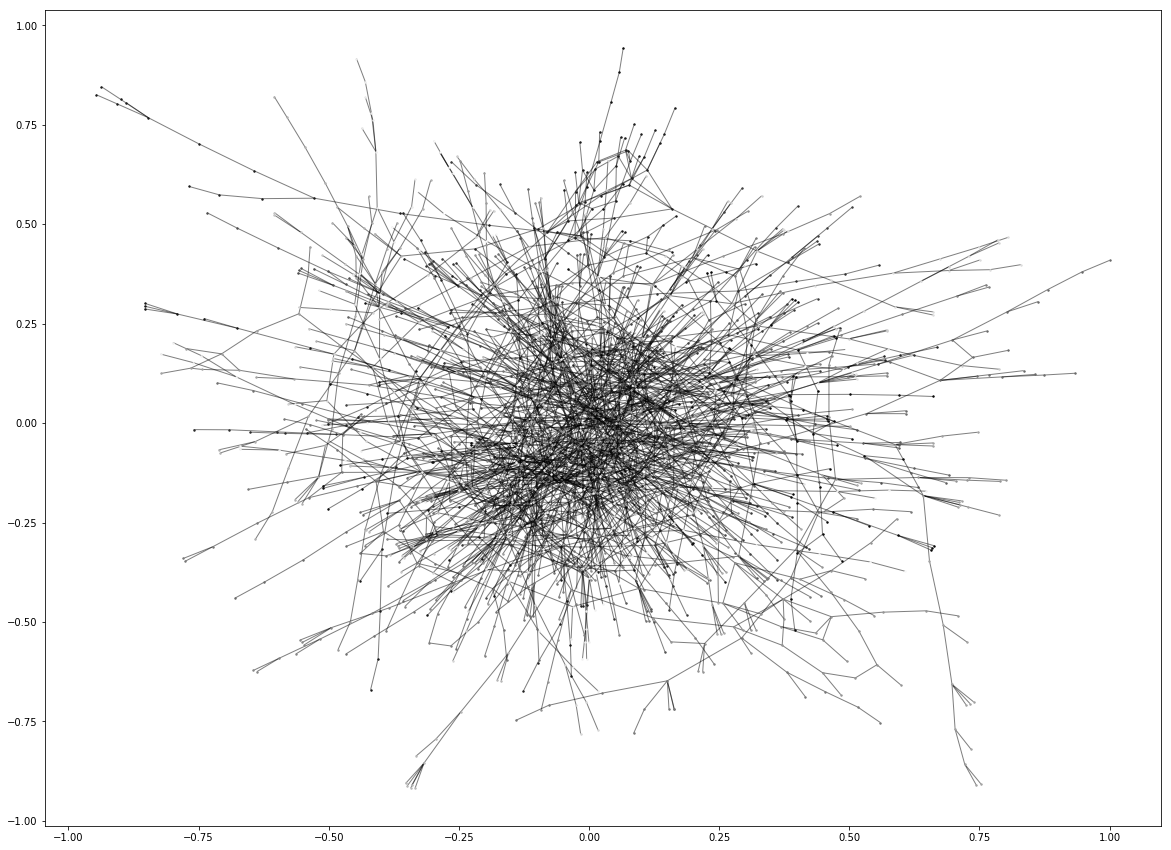

In [7]:

pos = nx.spring_layout(Market)
count = 0.
communities = dict()
subgraphs =[]
plt.figure(figsize=(20,15))
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(Market, pos, list_nodes, node_size = 2,
                                node_color = str(count / size))
    sub = Market.subgraph(list_nodes)
    countries = list(nx.get_node_attributes(sub,'Country').values())
    
    subgraphs.append(sub)
    communities[count] = [len(list_nodes),Counter(countries)]

nx.draw_networkx_edges(Market, pos, alpha=0.5)
plt.show()

The visualisation here is the one implemented in the Networkx package, based on the same principle as above, every community is represented in a different shade of gray. It is hard to distinguish the different parts. The same algorithm can be run on the Gephi software. The result is shown below, where only the bigest communities have been colored.

<img src="Communities_1.png" />

The spatialization gives another information, the communities are organized in filaments where most of the connection are "linear" (A connected to B connected to C connected to D ...) with some hubs, that looks like a tree. Obviously, according to the community detection fluctuation, this is too reducing to describes correctly the network, especially in the center where communities are linked to one another.

We can still get another insight on it by going down in the scale and look at each community and its composition. This can be done by changing the 'Community_number' parameter. Note that there is no particular ordering.

98 Nodes in community, the count by country is :
 Counter({'Argentina': 37, 'Colombia': 10, 'Mexico': 2, 'Bolivia': 2, 'Uruguay': 2, 'Spain': 2, 'Paraguay': 2, 'Ecuador': 1, 'Italy': 1})


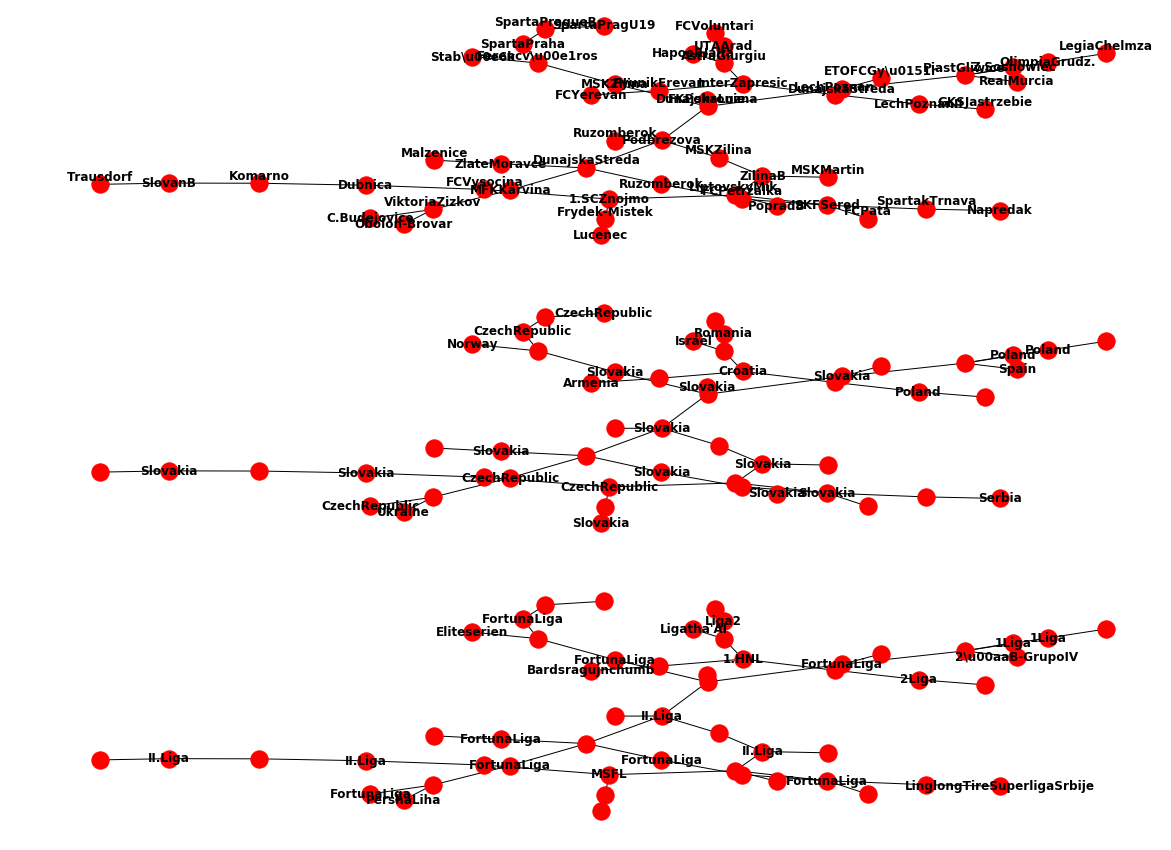

In [8]:
Community_number = 1

inf = communities[Community_number]
print('{} Nodes in community, the count by country is :\n {}'.format(inf[0],inf[1]))
sub = subgraphs[Community_number]
pos = nx.spring_layout(sub)
plt.figure(figsize=(20,15))
plt.subplot(311)
nx.draw(sub,pos,with_labels=True, font_weight='bold')
plt.subplot(312)
C=nx.get_node_attributes(sub,'Country')
nx.draw(sub,pos,labels=C, with_labels=True, font_weight='bold')
plt.subplot(313)
C=nx.get_node_attributes(sub,'League')
nx.draw(sub,pos,labels=C, with_labels=True, font_weight='bold')

The common feature is that in a single community, clubs from the same country tends to be connected to each other, and then the different parts are connected by 'hub' clubs. Still, some communities are really dominated by one country and seem to correspond to smaller leagues (second, third divisions, or from poorer championships). On the contrary, some are more connected and corresponds to bigger clubs, implied in more transfers. Lastly we can remark that most of the 'leaves' clubs that are at the border of the communities are small clubs, which makes sense regarding the financial aspect.

There are other types of community detection algorithm that could have been used such as Infomap or Stochastic Block models, but as the categorization remains unclear, and that properties of the networks are more related to the club level, it is more useful to spend some time studying centrality measures.


At this point, the transfer market can be described as mostly club driven. This can correlates to the fact that football is now a global economy where clubs are run as companies would be, the transfers are decided at this scale, and nationalities are not an important criteria for a player to be transfered. Still, we can retrieve some local behaviour, as it is easier to recruit players from your league or the league beneath, and it is espcially true for small clubs that cannot send recruiters all over the world. 

What could have been expected is to detect some tendencies or some preferential links between some leagues and other. This seems to not appear here but the question would require some further investigation of the statistics of the links inside communities. It can also be hidden by the only presence of 2019 tranfers which is a snapshot of the club links.

We will now focus on the study of the importance of individual nodes, hence on centrality measures.

## 4.Centralities

Centrality measures are tools that are useful to look at individual nodes properties, to identify which one are more "central", ie important. There are different definitions that do not capture the same properties. We will compute them and see if any useful information can result of it.

In [9]:
import networkx.algorithms.centrality as nxc

### 4.1.Degree

The degree centrality characterize the importance of a node based on the number of neighbors it has. We have seen in the first section that the average degree over the full network G was $1.94$. It is $2.4$ when taken over the $Market$ graph, which is still low but higher (coherent, we have remove a majority of nodes with degree 1). Still, the average doesn't give the full picture of a property, and it is more interesting to take a look at the degree distribution.

Informations on the big connected component "Market" :
 
Type: Graph
Number of nodes: 2450
Number of edges: 3037
Average degree:   2.4792


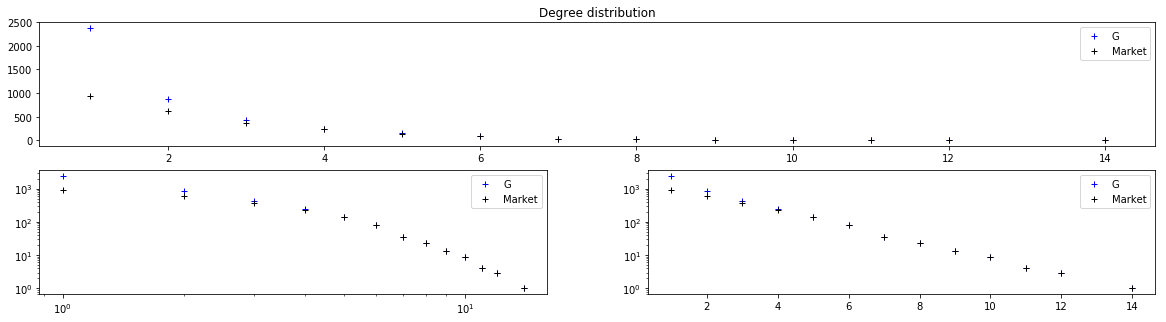

In [10]:
print('Informations on the big connected component "Market" :')
print(nx.info(Market).strip('Name:'))

degree_sequence = sorted([[n,d] for n, d in Market.degree()], key=lambda t: t[1], reverse=True) 
deg = [d for n,d in degree_sequence]
degree_nodes = [n for n,d in degree_sequence]
at = nxc.degree_centrality(Market) 
degree_c = list(at.values())

degree_sequence_G = sorted([[n,d] for n, d in G.degree()], key=lambda t: t[1], reverse=True) 
degG = [d for n,d in degree_sequence_G]
degree_nodesG = [n for n,d in degree_sequence_G]

dist = dict(Counter(deg))
count = dist.values()
degree_val = dist.keys()
distG = dict(Counter(degG))
countG = distG.values()
degree_valG = distG.keys()

plt.figure(figsize=(20,5))
plt.subplot(211)
plt.title('Degree distribution')
plt.plot(degree_valG,countG,'b+',label='G')
plt.plot(degree_val,count,'k+',label='Market')
plt.legend()
plt.subplot(223)
plt.plot(degree_valG,countG,'b+',label='G')
plt.plot(degree_val,count,'k+',label='Market')
plt.legend()
plt.yscale('log')
plt.xscale('log')

plt.subplot(224)
plt.plot(degree_valG,countG,'b+',label='G')
plt.plot(degree_val,count,'k+',label='Market')
plt.legend()
plt.yscale('log')



The figures show that the degree distribution seems to be an exponential law or a power law . This is coherent, as it is the case for a lot of real networks. From that we can stick to our conclusions : most clubs cannot do many transfers each summer, and only a few rich clubs do a lot of them.

We wnt to look at the important nodes, so let's see which clubs are at the top of the charts !

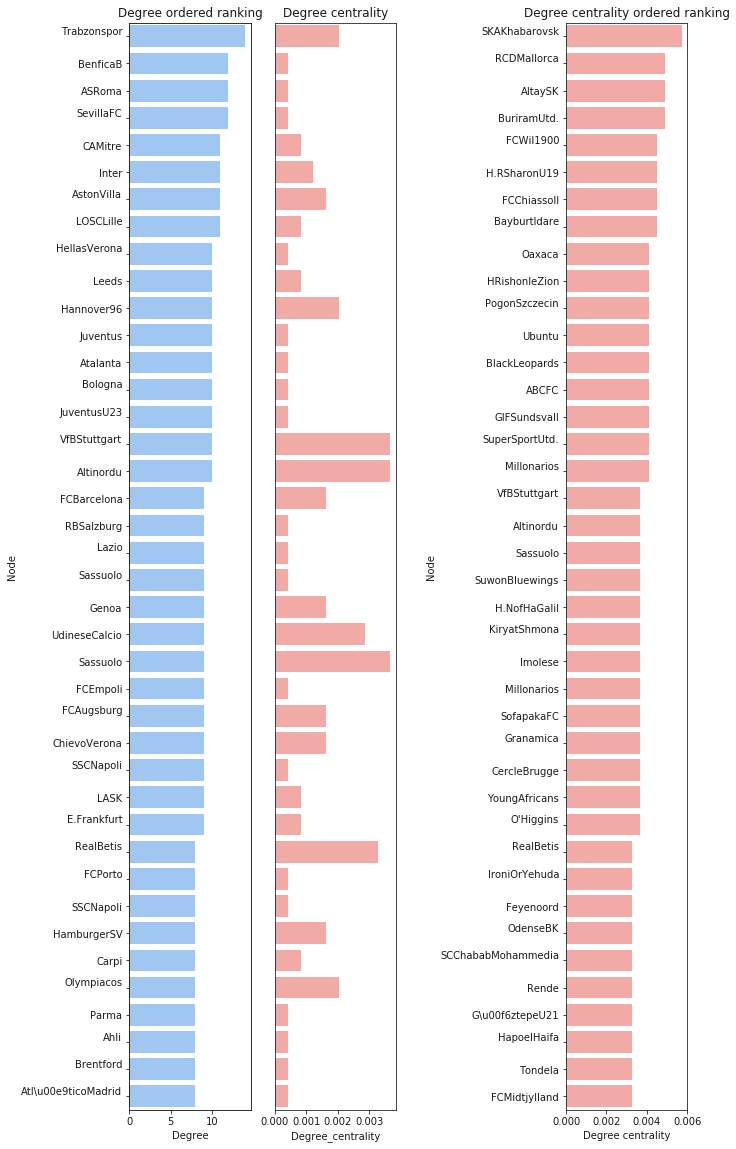

In [11]:
import pandas as pas
import seaborn as sns
n=40 #Number of clubs to be plotted
data = {'Node' : degree_nodes[0:n], 'Degree' : deg[0:n], 'Degree_centrality': degree_c[0:n]}
d = pas.DataFrame.from_dict(data)
plt.figure(figsize=(10,20))
plt.subplot(141)
plt.title('Degree ordered ranking')
sns.set_color_codes("pastel")
sns.barplot(x="Degree", y="Node", data=d,
            label="Total", color="b")
plt.subplot(142)
plt.title('Degree centrality')
sns.set_color_codes("pastel")
sns.barplot(x="Degree_centrality",y='Node', data=d,
            label="Total", color="r")
plt.ylabel('')
plt.yticks([])
plt.subplot(144)
plt.title('Degree centrality ordered ranking')
degree_seq = sorted([[n,d] for n, d in zip(degree_nodes,degree_c)], key=lambda t: t[1], reverse=True) 
degc = [d for n,d in degree_seq]
degree_no = [n for n,d in degree_seq]
dat = {'Node' : degree_no[0:n], 'Degree centrality' : degc[0:n]}
da = pas.DataFrame.from_dict(dat)
sns.barplot(x="Degree centrality",y='Node', data=da,
            label="Total", color="r")
#sns.despine(left=True, bottom=True)
plt.show()

The results of this two rankings are surprinsigly different, this means the degree cetrality computed by networkx doesn't only computes the degree but takes also into account the degree of neighbors. The degree chart results could have been guessed : it contains mostly european clubs that play in european cups We can also recognize clubs that are known for their transfer policies such as Benfica, Trabzonspor or LOSC. None of those rich clubs appear on the centrality ranking, they might buy players to smaller clubs that do not have much of an importance on the network.

It is those smaller clubs that can be found in the centrality ranking : those are clubs that make transfers with clubs that make transfers, which means those are medium wealth clubs that can buy and sell and thus have a good score on degree centrality. Another category is the training center, there are some youth teams that score well (Puebla FC U20, Rennes B, FC Bayern U19) as well as known devellopment club (Le Havre AC). Those clubs are training young players that are coming in the player market, some of them obtain a contract with the professionnal team and other are transferd to other clubs. This type of club is important for the network because they produce players. In a directed network, those two different categories could be detected as the first one would have a tendency of buying and selling players, and the second one would have a low in-degree because they do not buy players. It has to be noted that the results of the degree centrality depend on the iteration of the notebook, but the conclusions seems to hold, with the same type of clubs.

The degree centrality has revealed some characteristics of the clubs that are important in the tranfer market, but there are other ways to find them and to rank them.

### 4.2.Eigenvector centrality and PageRank

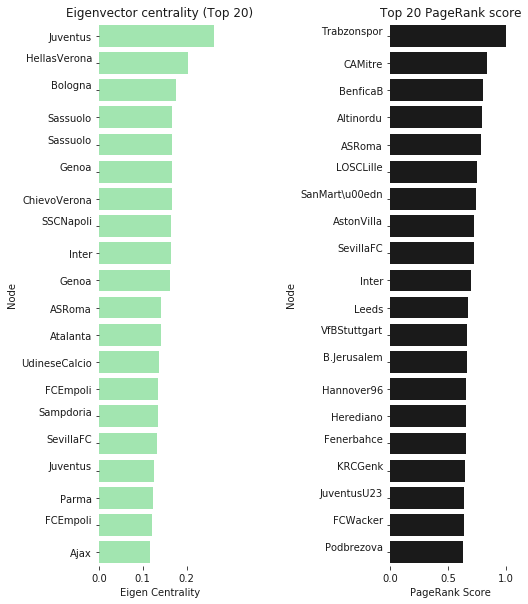

In [12]:
n=20 #Number of clubs to be plotted
eig_c = nxc.eigenvector_centrality_numpy(Market)
eig_sequence = sorted([[key,eig_c[key]] for key in eig_c.keys()], key=lambda t: t[1], reverse=True) 
eig_val = [d for n,d in eig_sequence]
eig_nodes = [n for n,d in eig_sequence]
dat_eig = pas.DataFrame.from_dict({'Node' : eig_nodes[0:n], 'Eigen Centrality' : eig_val[0:n]})

pr_c = nx.algorithms.link_analysis.pagerank_alg.pagerank(Market)
pr_sequence = sorted([[key,pr_c[key]] for key in pr_c.keys()], key=lambda t: t[1], reverse=True) 
pr_val = np.array([d for n,d in pr_sequence])/pr_sequence[0][1]
pr_nodes = [n for n,d in pr_sequence]
dat_pr = pas.DataFrame.from_dict({'Node' : pr_nodes[0:n], 'PageRank Score' : pr_val[0:n]})

plt.figure(figsize=(10,10))
plt.subplot(142)
plt.title('Eigenvector centrality (Top {})'.format(n))
sns.set_color_codes("pastel")
sns.barplot(x="Eigen Centrality", y="Node", data=dat_eig,
            label="Total", color="g")
plt.subplot(144)
plt.title('Top {} PageRank score'.format(n))
sns.barplot(x="PageRank Score", y="Node", data=dat_pr,
            label="Total", color="k")
sns.despine(left=True, bottom=True)
plt.show()

The eigenvector centrality highlights the importance of the italian $Serie A$ in the structure of the network. Either the italian market has been particularly active this summer or this might be an artifact from the fact that this centrality tends to develop over the neighbors of an high centrality node.  

On the contrary, the PageRank score is far more similar to the results obtained before with degree centrality (at least for my first iteration, so the same analysis holds). Some special cases arose, like the CA Mitre. It is a club from the argentinian second league, and has made a lot of changes in the summer resulting in being very important in the central america region and thus appearing in the ranking. We find in this chart the categories listed above.

### 4.3.Betweenness centrality

Finally we will look at another centrality measure : betweenness centrality. It is a commonly use matric that is based on the number of shortest path passing through a node. It helps measuring if the node is an important bridge in the network.

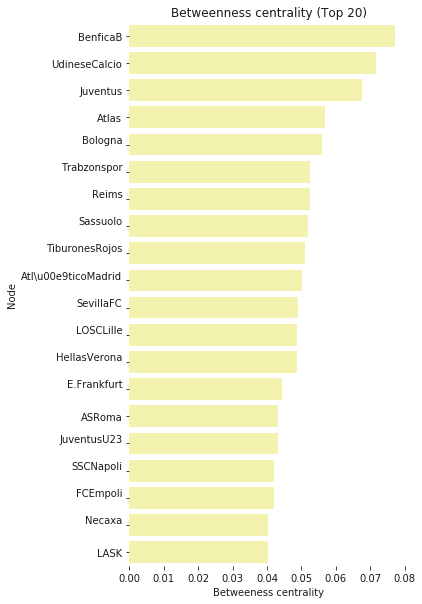

In [13]:
n=20 #Number of clubs to be plotted
bet_c = nxc.betweenness_centrality(Market)
bet_sequence = sorted([[key,bet_c[key]] for key in bet_c.keys()], key=lambda t: t[1], reverse=True) 
bet_val = [d for n,d in bet_sequence]
bet_nodes = [n for n,d in bet_sequence]
dat_bet = pas.DataFrame.from_dict({'Node' : bet_nodes[0:n], 'Betweeness centrality' : bet_val[0:n]})

plt.figure(figsize=(5,10))
plt.title('Betweenness centrality (Top {})'.format(n))
sns.set_color_codes("pastel")
sns.barplot(y="Node", x="Betweeness centrality", data=dat_bet,
            label="Total", color="y")
sns.despine(left=True, bottom=True)
plt.show()

The result are quite similar to the one from PageRank and degree centrality, but we can see an emphasis on the clubs that are medium size in the best european leagues : these are the club that have some money to buy young or medium class players, that developp them and sell them later to the biggest clubs. Those are really the clubs that structure and connect the different parts of the market together.

### 4.4.Visualization

Text(0.5,1,'Betweenness centrality')

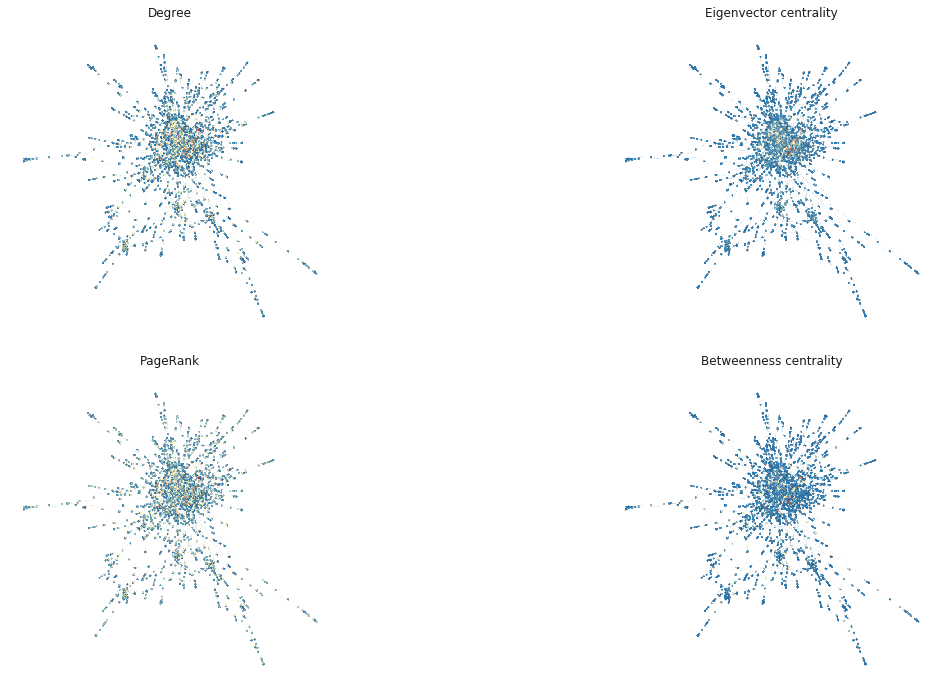

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(plt.imread('deg.png'))
plt.xticks([])
plt.yticks([])
plt.title('Degree')
plt.subplot(222)
plt.imshow(plt.imread('eig_cen.png'))
plt.xticks([])
plt.yticks([])
plt.title('Eigenvector centrality')
plt.subplot(223)
plt.imshow(plt.imread('PageRank.png'))
plt.xticks([])
plt.yticks([])
plt.title('PageRank')
plt.subplot(224)
plt.imshow(plt.imread('bet_cen.png'))
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])
plt.title('Betweenness centrality')

If there is need for a zoom

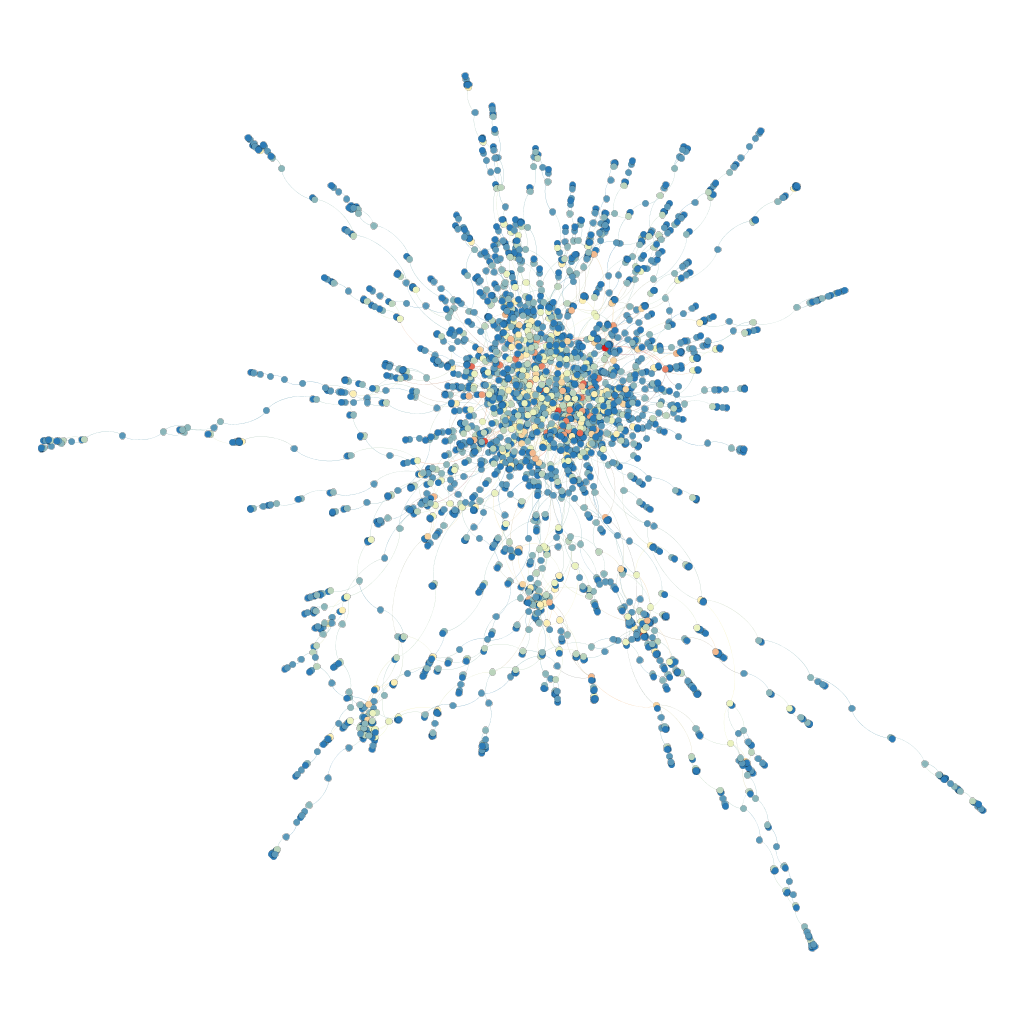

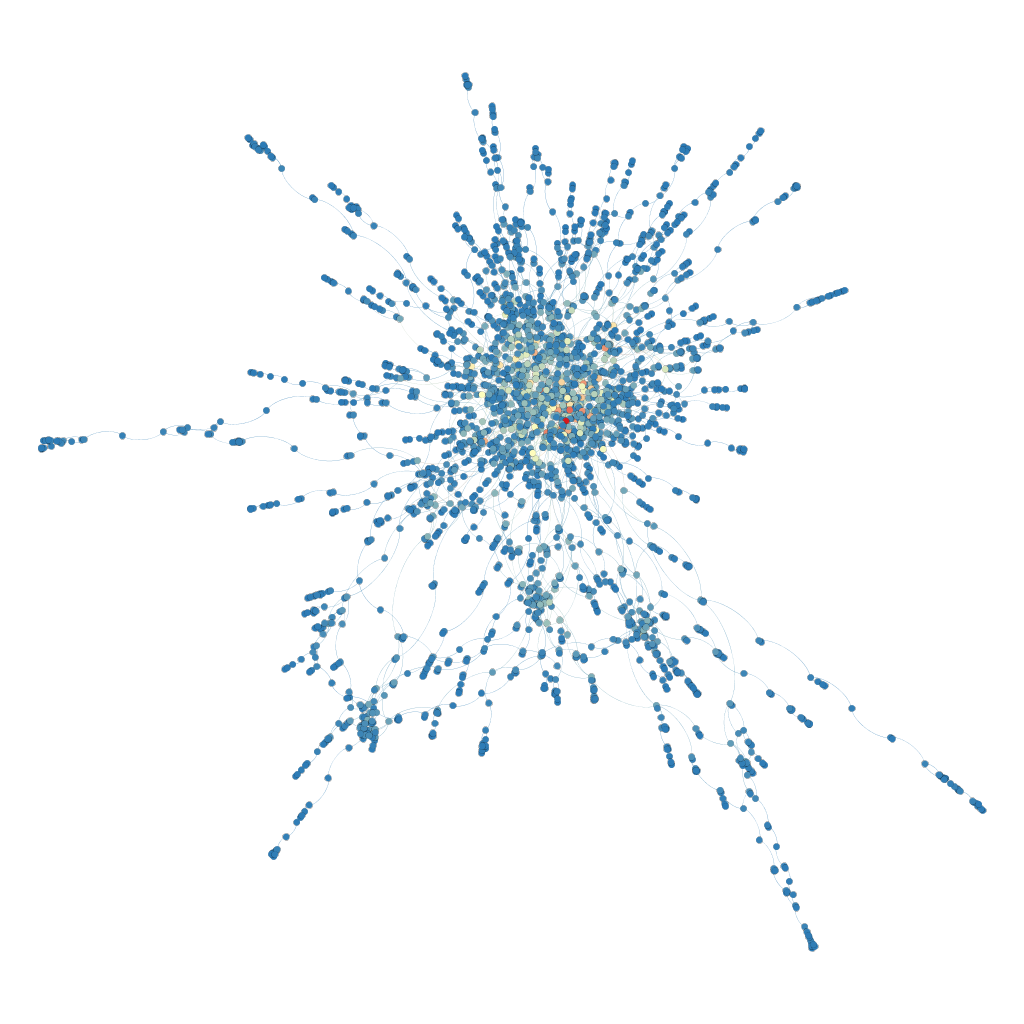

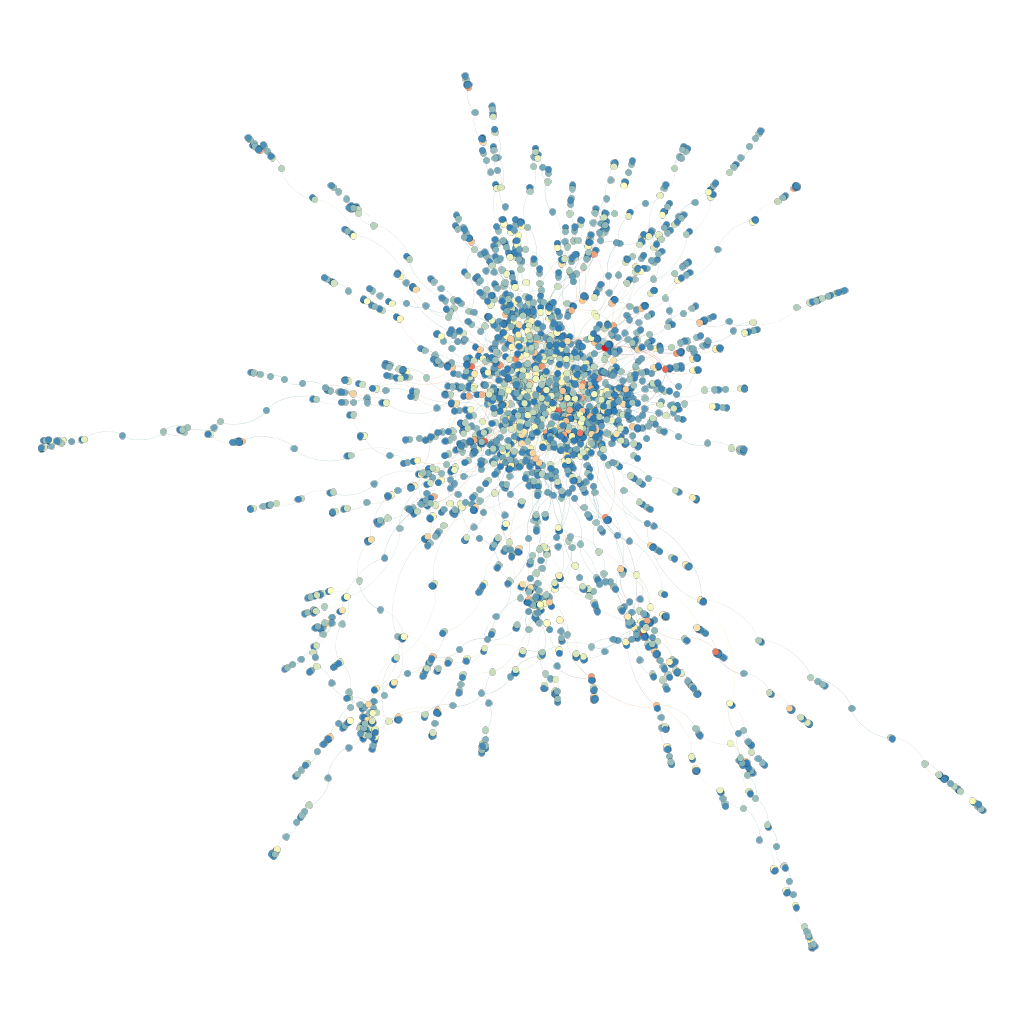

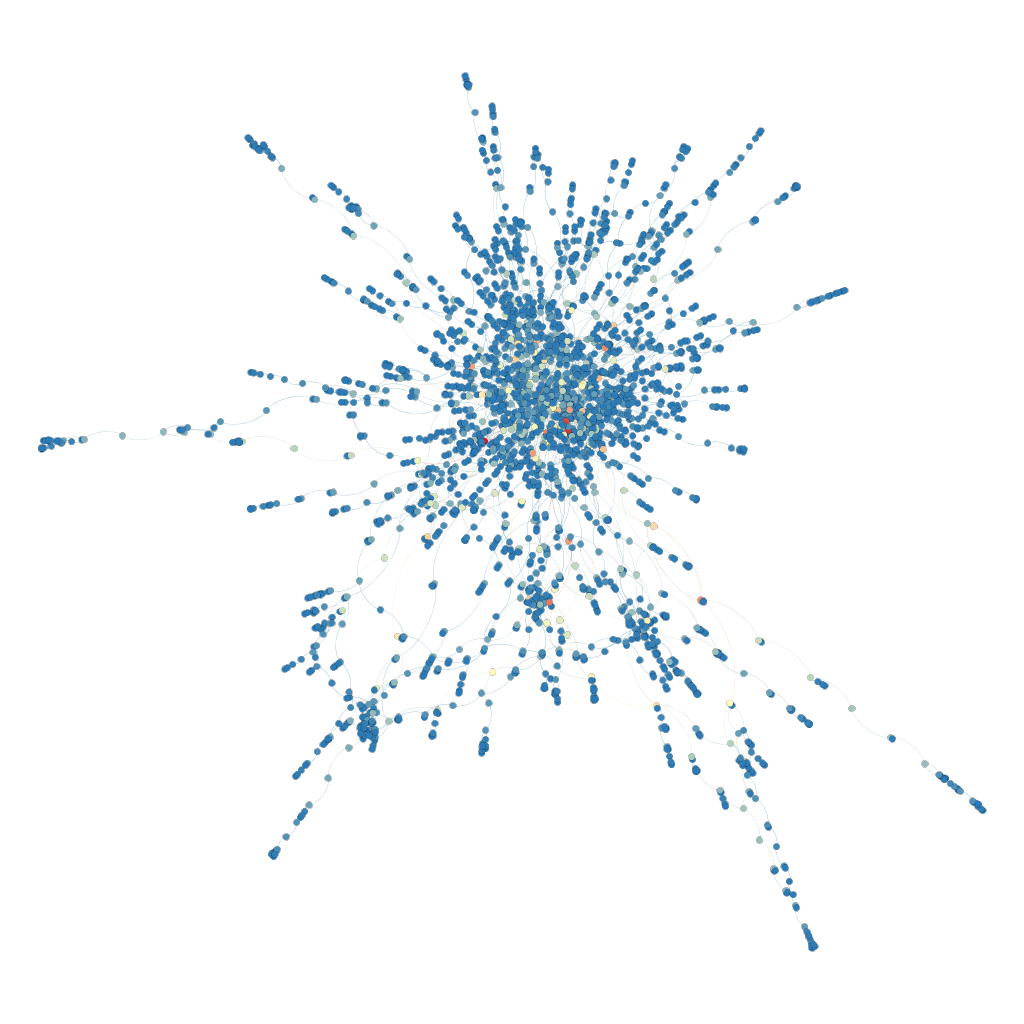

In [15]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='deg.png') 
y = Image(filename='eig_cen.png')
u = Image(filename='PageRank.png')
v = Image(filename='bet_cen.png')
display(x, y,u,v)

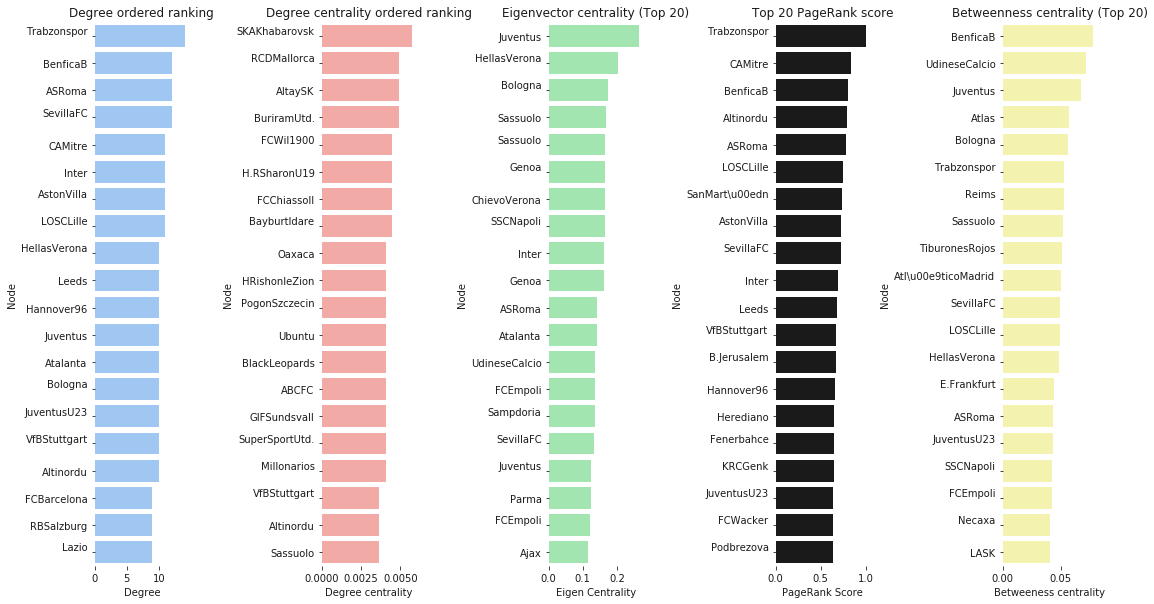

In [16]:
n=20 #Number of clubs to be plotted


data = {'Node' : degree_nodes[0:n], 'Degree' : deg[0:n], 'Degree_centrality': degree_c[0:n]}
d = pas.DataFrame.from_dict(data)
dat = {'Node' : degree_no[0:n], 'Degree centrality' : degc[0:n]}
da = pas.DataFrame.from_dict(dat)
dat_eig = pas.DataFrame.from_dict({'Node' : eig_nodes[0:n], 'Eigen Centrality' : eig_val[0:n]})
dat_pr = pas.DataFrame.from_dict({'Node' : pr_nodes[0:n], 'PageRank Score' : pr_val[0:n]})
dat_bet = pas.DataFrame.from_dict({'Node' : bet_nodes[0:n], 'Betweeness centrality' : bet_val[0:n]})

plt.figure(figsize=(20,10))
plt.subplot(1,10,1)
plt.title('Degree ordered ranking')
sns.set_color_codes("pastel")
sns.barplot(x="Degree", y="Node", data=d,
            label="Total", color="b")
plt.subplot(1,10,3)
plt.title('Degree centrality ordered ranking')
sns.barplot(x="Degree centrality",y='Node', data=da,
            label="Total", color="r")
plt.subplot(1,10,5)
plt.title('Eigenvector centrality (Top {})'.format(n))
sns.set_color_codes("pastel")
sns.barplot(x="Eigen Centrality", y="Node", data=dat_eig,
            label="Total", color="g")
plt.subplot(1,10,7)
plt.title('Top {} PageRank score'.format(n))
sns.barplot(x="PageRank Score", y="Node", data=dat_pr,
            label="Total", color="k")
plt.subplot(1,10,9)
plt.title('Betweenness centrality (Top {})'.format(n))
sns.set_color_codes("pastel")
sns.barplot(y="Node", x="Betweeness centrality", data=dat_bet,
            label="Total", color="y")
sns.despine(left=True, bottom=True)
plt.savefig('Summary_centralities.png')
plt.show()

## 5.Conclusion

As we could expect, the market is composed by several type of clubs. There are rich clubs like the Juventus or Aston Villa that can buy and sell a lot of player because they have the pool of players and the money to do so. However, they are few of them that appear in the rankings, because most of them do few but expensive moves on the market. The type of club that appear to be the core, are the "rich but not that rich" clubs that play in the first league of their country but are not top tier clubs. They buy players from lower leagues or other countries, because they can't do more, and then eventually sell players to oter clubs of this type or bigger clubs. Also, clubs that are known to have such policies can be identify, particularly with the betweenness centrality. The PageRank score seems to indicate clubs that have performed well in the transfer market in 2019 with clubs that have sold and buy players in similar leagues whereas the eigenvector centrality captured the fact that the italian market as been an hot place of the summer, that could be explained by the recent italian laws on sponsoring taxation, but can also be an artifact of the eigenvector centrality algorithm.

This analysis has not led to big discoveries on the structure of the football economy or transfer market, but it has confirmed some $a\ priori$ football followers could have. Still, it help taking a look at the global scale, with the importance of mexican, turkish, russian, argentinian clubs in the global picture. The results could be improved by further work, looking more into the details of the centrality measures, their corelation, the spatial distribution, the type of clubs of the neighbors. Another persepctive of future work would be to look at a directed (in and out transfer) and/or weighted (with the value of the transfers for example) network that could lead to a better characterization of the structure of the market. Furthermore, with more data from previous year, it could be possible to look at a dynamical network and see the evolution of the structure with the globalization of the economy and the creation of the different strategies for clubs to survive in this environnement. In my opinion, this would be very interesting, however I don't think it would result in big discoveries on an already very observed background, but more to a nice overview of it.

<img src="Final.png" />

(Market, colored by community and sized by betweenness centrality)